# Esercitazione 7

# Esercizio 07.1

Nel primo esercizio di questa esercitazione ci è stato chiesto di utilizzare il codice Monte Carlo NVT fornito per stampare i valori istantanei di energia potenziale per particella $U/N$ e della pressione $P$ in tre diverse condizioni termodinamiche (fase liquida, solida e gassosa). Tramite uno script Python abbiamo quindi calcolato la funzione di autocorrelazione di queste grandezze, per ottenere quindi il tempo di correlazione Monte Carlo tramite un fit esponenziale. Questo ci ha suggerito la dimensione dei blocchi da utilizzare successivamente per il calcolo di valori medi, con relative incertezze, tramite data-blocking.

Ancora una volta, le misure vanno effettuate quando il sistema è in equilibrio. Abbiamo verificato, osservando l'andamento delle grandezze "istantanee", che questa condizione viene raggiunta quasi istantaneamente dopo l'inizio della simulazione.

Oltre alla funzione di autocorrelazione, di seguito viene presentato un andamento dell'errore al variare della dimensione del blocco.

# Liquido

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def AutoCorrelation(x, tau):
    lenght = len(x)-tau
    x_t=0
    x_tT=0
    x_xT=0
    x_2=0
    
    for t in range(lenght):
        x_t  += x[t]
        x_tT += x[t+tau]
        x_xT += x[t]*x[t+tau]
        x_2  += x[t]**2
        
    x_t  = x_t/lenght
    x_tT = x_tT/lenght
    x_xT = x_xT/lenght
    x_2  = x_2/lenght
    return (x_xT-x_t*x_tT)/(x_2-x_t**2)

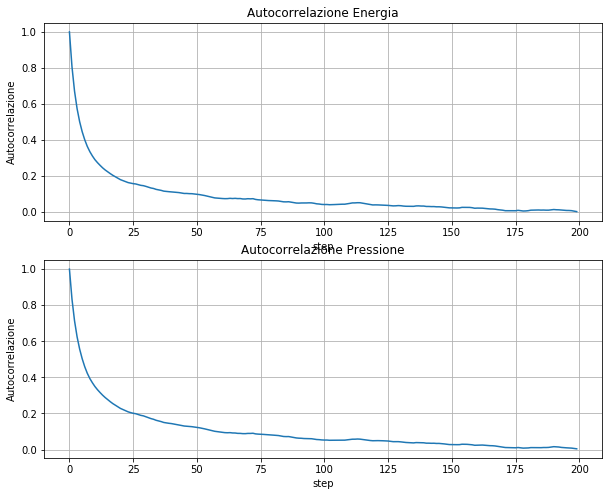

In [2]:
e = np.loadtxt("Esercizio07.1/Liquido/output.epot.0")
p = np.loadtxt("Esercizio07.1/Liquido/output.pres.0")

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(200):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
axs[0].plot(x,acU)
axs[1].plot(x,acP)

axs[0].set_title('Autocorrelazione Energia')
axs[1].set_title('Autocorrelazione Pressione')
axs[0].set_xlabel ('step')
axs[1].set_xlabel ('step')
axs[0].set_ylabel ('Autocorrelazione')
axs[1].set_ylabel ('Autocorrelazione')
axs[0].grid(True)
axs[1].grid(True)

plt.show()

In [3]:
from scipy.optimize import curve_fit

def f(x,a):
    return np.exp(-a*x)

Tempo di Correlazione Energia: 
[9.61226298]
Tempo di Correlazione Pressione: 
[13.11666072]


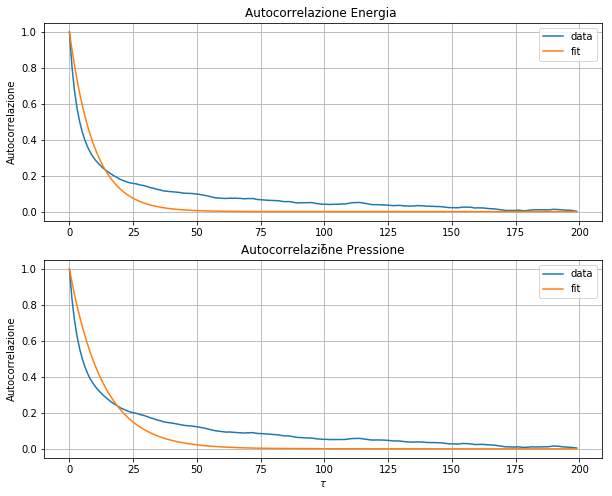

In [4]:
p_opt, p_cov = curve_fit(f, x, acU)
print("Tempo di Correlazione Energia: ")
print(1/p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") 
axs[0].plot(x,fit, label="fit") 

p_optp, p_covp = curve_fit(f, x, acP)
print("Tempo di Correlazione Pressione: ")
print(1/p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") 
axs[1].plot(x,fit, label="fit") 

axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Autocorrelazione')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Autocorrelazione')

axs[0].set_title('Autocorrelazione Energia ')
axs[1].set_title('Autocorrelazione Pressione')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

In [5]:
L = np.array([10, 100, 500, 1000, 2000, 2500, 4000, 5000])
M = len(y_e)
N = M/L
print(N)

[10000.  1000.   200.   100.    50.    40.    25.    20.]


In [6]:
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/l 
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
        
    errors[index]=err
    index+=1 

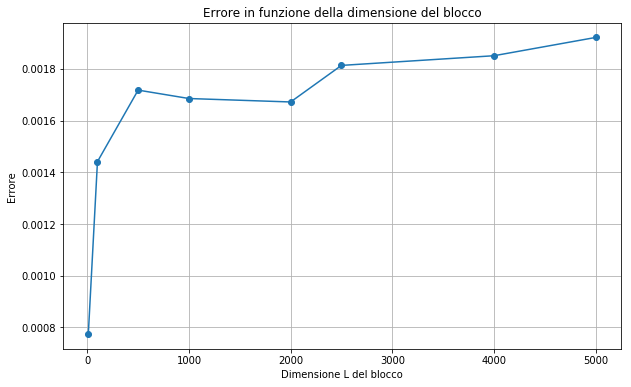

In [8]:
plt.figure(figsize=(10,6))

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Dimensione L del blocco")
plt.ylabel("Errore")
plt.grid(True)
plt.title('Errore in funzione della dimensione del blocco')
plt.show()

# Solido

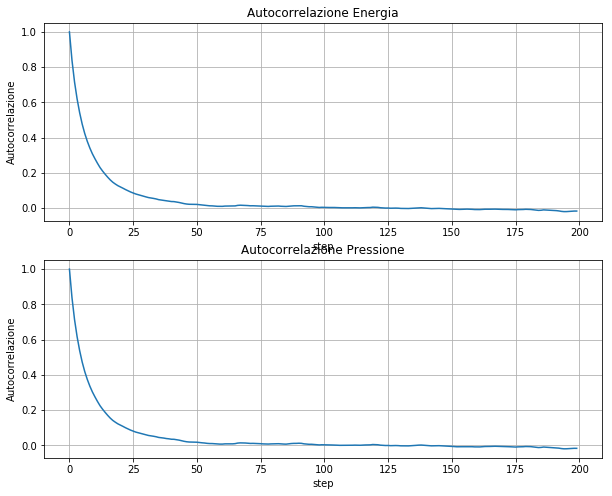

In [9]:
e = np.loadtxt("Esercizio07.1/Solido/output.epot.0")
p = np.loadtxt("Esercizio07.1/Solido/output.pres.0")

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(200):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
axs[0].plot(x,acU)
axs[1].plot(x,acP)

axs[0].set_title('Autocorrelazione Energia')
axs[1].set_title('Autocorrelazione Pressione')
axs[0].set_xlabel ('step')
axs[1].set_xlabel ('step')
axs[0].set_ylabel ('Autocorrelazione')
axs[1].set_ylabel ('Autocorrelazione')
axs[0].grid(True)
axs[1].grid(True)

plt.show()

Tempo di Correlazione Energia: 
[8.04501896]
Tempo di Correlazione Pressione: 
[7.90496593]


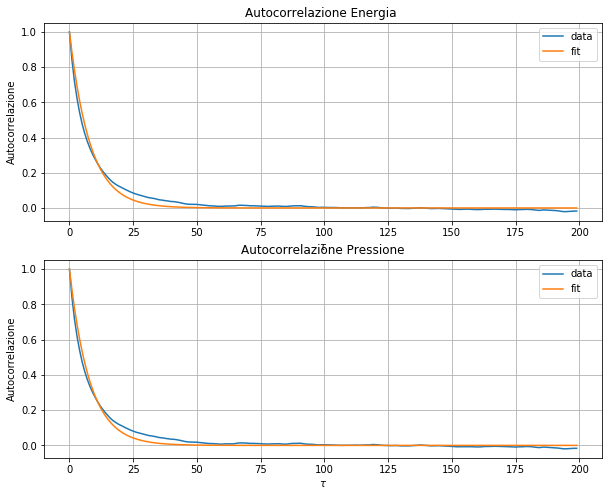

In [10]:
p_opt, p_cov = curve_fit(f, x, acU)
print("Tempo di Correlazione Energia: ")
print(1/p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") 
axs[0].plot(x,fit, label="fit") 

p_optp, p_covp = curve_fit(f, x, acP)
print("Tempo di Correlazione Pressione: ")
print(1/p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") 
axs[1].plot(x,fit, label="fit") 

axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Autocorrelazione')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Autocorrelazione')

axs[0].set_title('Autocorrelazione Energia ')
axs[1].set_title('Autocorrelazione Pressione')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

In [11]:
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/l 
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
        
    errors[index]=err
    index+=1 

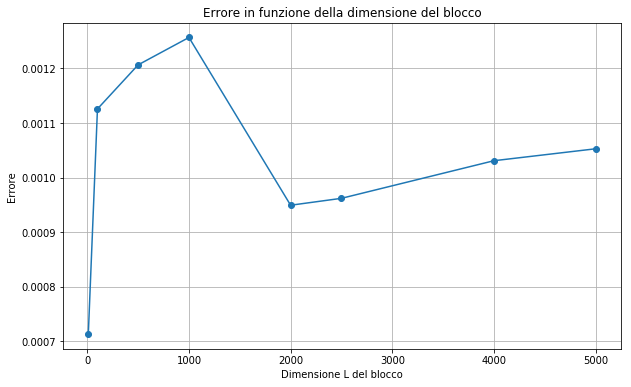

In [13]:
plt.figure(figsize=(10,6))

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Dimensione L del blocco")
plt.ylabel("Errore")
plt.grid(True)
plt.title('Errore in funzione della dimensione del blocco')
plt.show()

# Gas

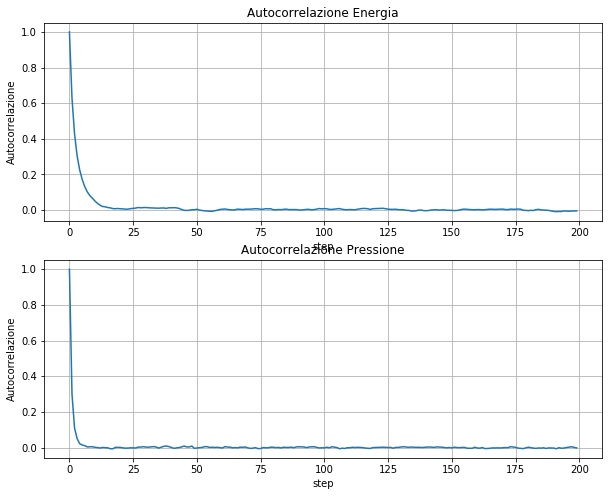

In [14]:
e = np.loadtxt("Esercizio07.1/Gas/output.epot.0")
p = np.loadtxt("Esercizio07.1/Gas/output.pres.0")

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(200):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
axs[0].plot(x,acU)
axs[1].plot(x,acP)

axs[0].set_title('Autocorrelazione Energia')
axs[1].set_title('Autocorrelazione Pressione')
axs[0].set_xlabel ('step')
axs[1].set_xlabel ('step')
axs[0].set_ylabel ('Autocorrelazione')
axs[1].set_ylabel ('Autocorrelazione')
axs[0].grid(True)
axs[1].grid(True)

plt.show()

Tempo di Correlazione Energia: 
[2.63625038]
Tempo di Correlazione Pressione: 
[0.86620628]


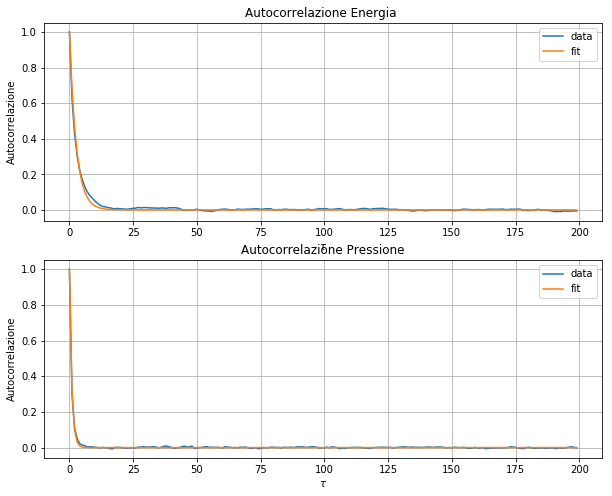

In [15]:
p_opt, p_cov = curve_fit(f, x, acU)
print("Tempo di Correlazione Energia: ")
print(1/p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") 
axs[0].plot(x,fit, label="fit") 

p_optp, p_covp = curve_fit(f, x, acP)
print("Tempo di Correlazione Pressione: ")
print(1/p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") 
axs[1].plot(x,fit, label="fit") 

axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Autocorrelazione')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Autocorrelazione')

axs[0].set_title('Autocorrelazione Energia ')
axs[1].set_title('Autocorrelazione Pressione')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

In [16]:
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/l 
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
        
    errors[index]=err
    index+=1 

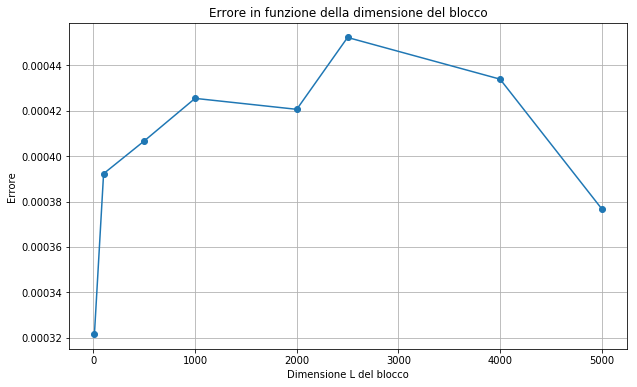

In [18]:
plt.figure(figsize=(10,6))

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Dimensione L del blocco")
plt.ylabel("Errore")
plt.grid(True)
plt.title('Errore in funzione della dimensione del blocco')
plt.show()

Successivamente, come richiesto dagli esercizi 07.2 e 07.3, abbiamo aggiunto ai codici Monte Carlo NVT e Dinamica Molecolare la possibilità di calcolare la funzione di distribuzione radiale $g(r)$ (valori medi ed incertezze).

# Esercizio 07.4

In questo esercizio confronto la $g(r)$ calcolata con metodi Monte Carlo e mediante il software di Dinamica Molecolare. Mostriamo inoltre gli andamenti di $U/N$ e di $P$, calcolati tramite data blocking nel codice Monte Carlo, per Argo e Krypton, nelle condizioni termodinamiche richieste. Le unità di misura utilizzate sono le seguenti: [eV] per le energie e [atm] per le pressioni.

Per prima cosa confronto le $g(r)$ delle tre fasi.

In [19]:
plt.rcParams['figure.figsize'] = [16,9]

k_b = 8.617333*10**-5    #costante di Boltzmann in eV/K
k_bj = 1.380649*10**-23  #costante di Boltzmann in J/K

sigma_arg=0.34*10**-9    #m
epsilon_arg=120*k_b      #eV
t_arg = 120              #K

sigma_kry = 0.364*10**-9 #m
epsilon_kry = 164*k_b    #eV
t_kry = 164              #K


p_arg = t_arg*k_bj*10**-5/(sigma_arg**3)  #atm
p_kry = t_kry*k_bj*10**-5/(sigma_kry**3)  #atm

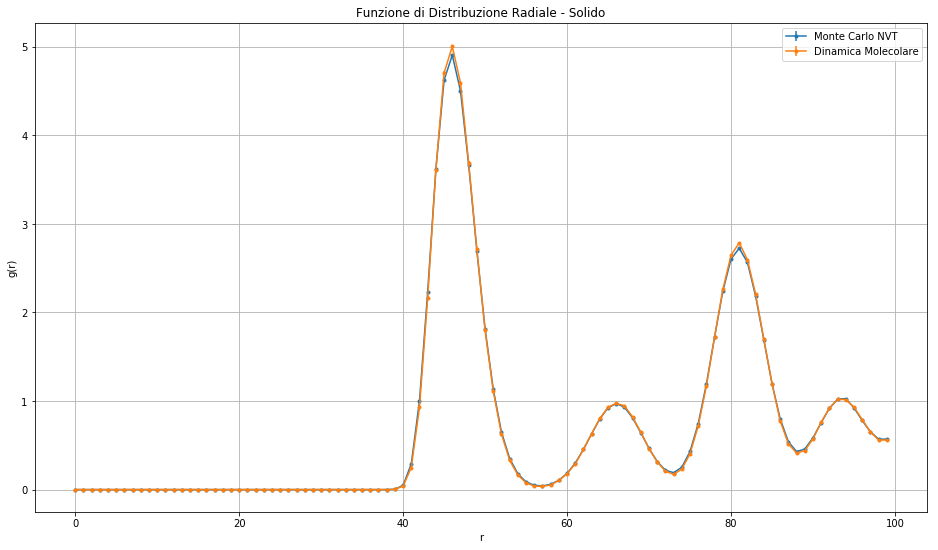

In [20]:
k=np.loadtxt("Esercizio07.4/MC/Solido/output.gave.0")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("Esercizio07.4/MolDyn/Solido/output.gave.0")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Dinamica Molecolare")
plt.title("Funzione di Distribuzione Radiale - Solido")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

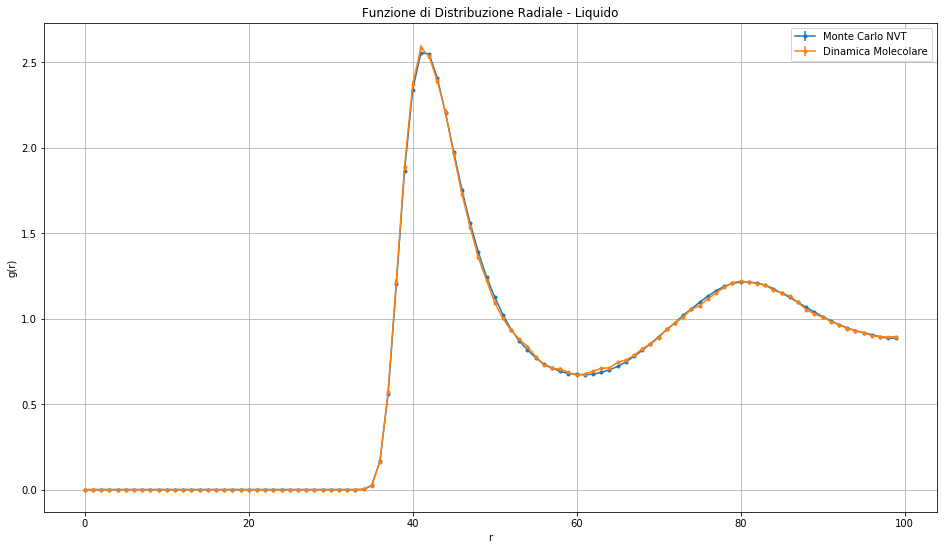

In [21]:
k=np.loadtxt("Esercizio07.4/MC/Liquido/output.gave.0")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("Esercizio07.4/MolDyn/Liquido/output.gave.0")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Dinamica Molecolare")
plt.title("Funzione di Distribuzione Radiale - Liquido")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

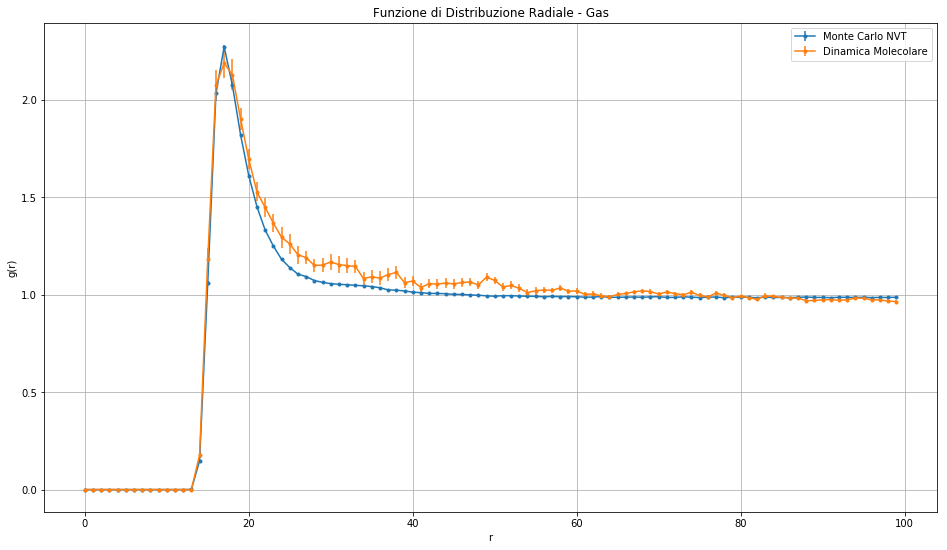

In [22]:
k=np.loadtxt("Esercizio07.4/MC/Gas/output.gave.0")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("Esercizio07.4/MolDyn/Gas/output.gave.0")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Dinamica Molecolare")
plt.title("Funzione di Distribuzione Radiale - Gas")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

Come possiamo vedere, nonostante i due approcci siano radicalemente differenti, le funzioni trovate sono compatibili entro il margine d'errore.

Ora mostro gli andamenti di pressioni ed energia, mediante data blocking, dei due gas nelle tre fasi possibili.


# Solido

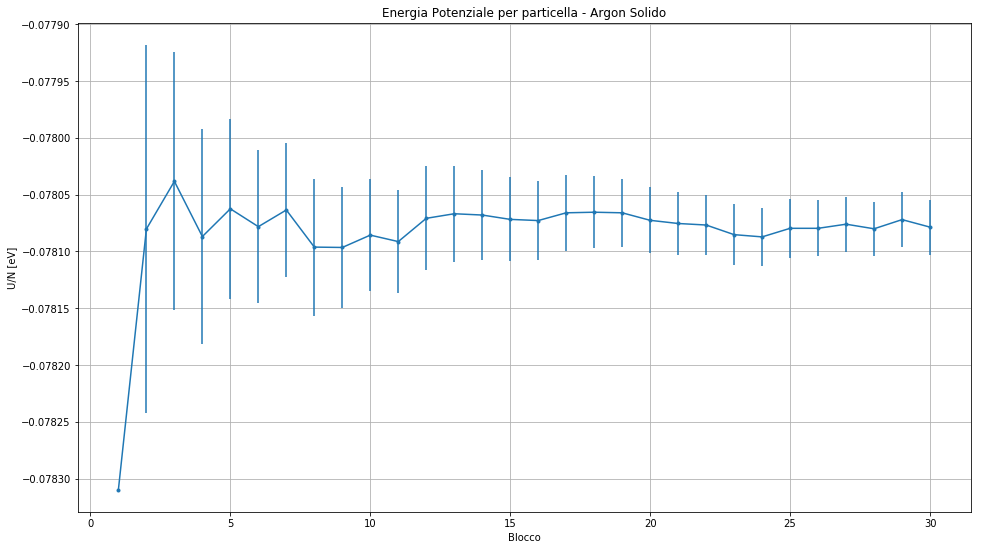

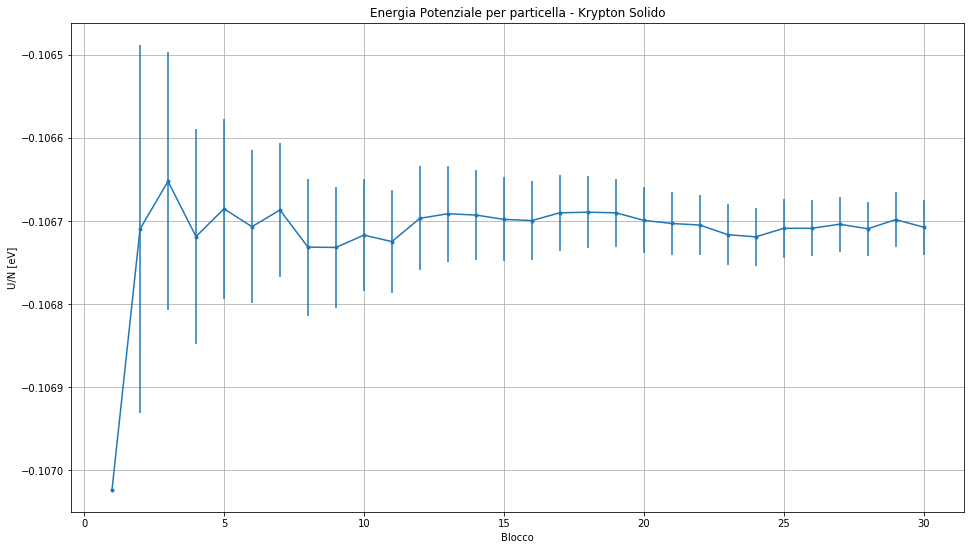

In [23]:
#Argon
k=np.loadtxt("Esercizio07.4/MC/Solido/output.epot.0")
x=k[:,0]
y=k[:,2]*epsilon_arg
err=k[:,3]*epsilon_arg

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia Potenziale per particella - Argon Solido")
plt.xlabel("Blocco")
plt.ylabel("U/N [eV]")
plt.grid()
plt.show()

#Krypton
x=k[:,0]
y=k[:,2]*epsilon_kry
err=k[:,3]*epsilon_kry

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia Potenziale per particella - Krypton Solido")
plt.xlabel("Blocco")
plt.ylabel("U/N [eV]")
plt.grid()
plt.show()

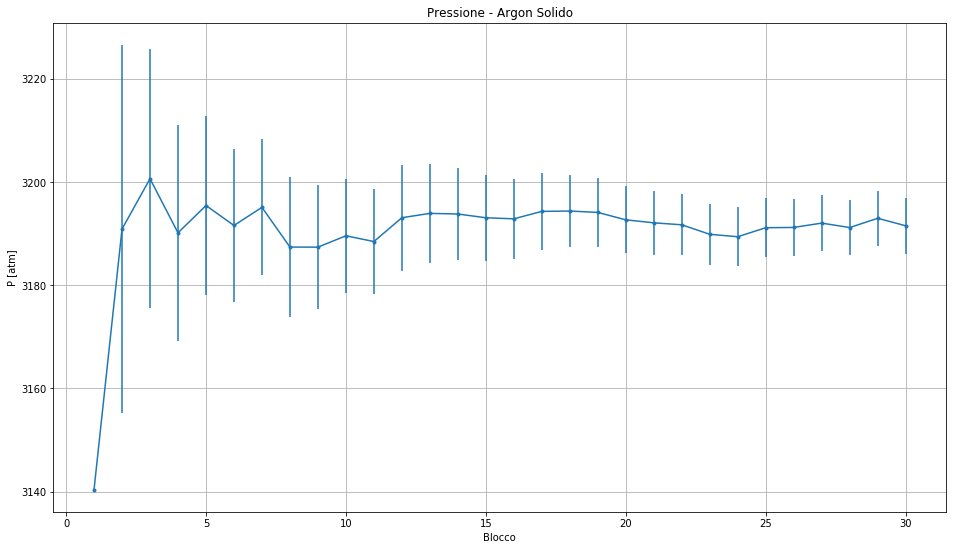

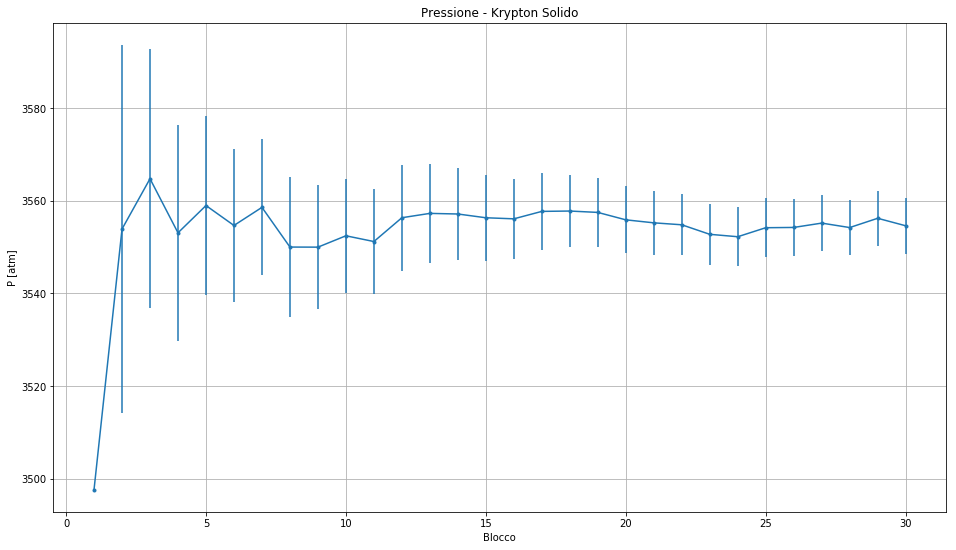

In [24]:
#Argon
k=np.loadtxt("Esercizio07.4/MC/Solido/output.pres.0")
x=k[:,0]
y=k[:,2]*p_arg
err=k[:,3]*p_arg

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Pressione - Argon Solido")
plt.xlabel("Blocco")
plt.ylabel("P [atm]")
plt.grid()
plt.show()

#Krypton
x=k[:,0]
y=k[:,2]*p_kry
err=k[:,3]*p_kry

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Pressione - Krypton Solido")
plt.xlabel("Blocco")
plt.ylabel("P [atm]")
plt.grid()
plt.show()

# Liquido

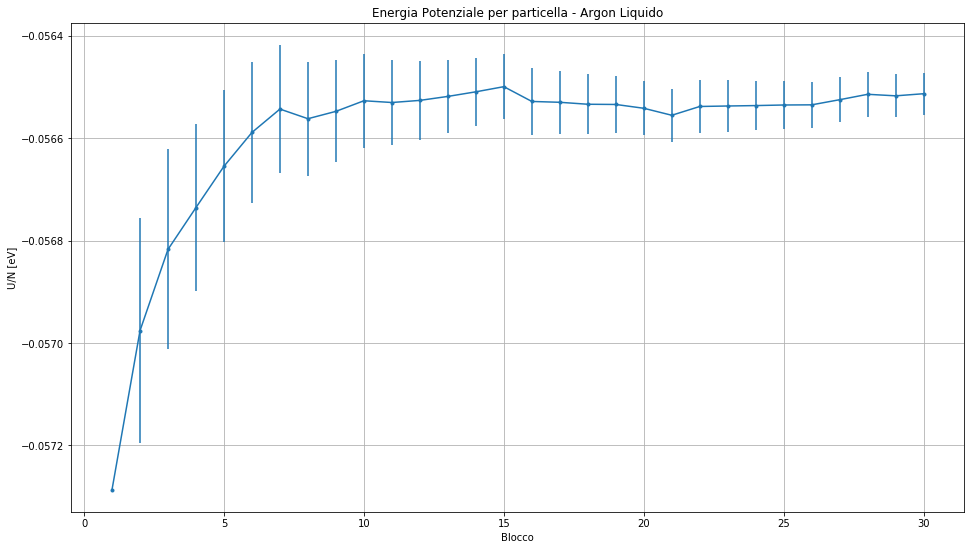

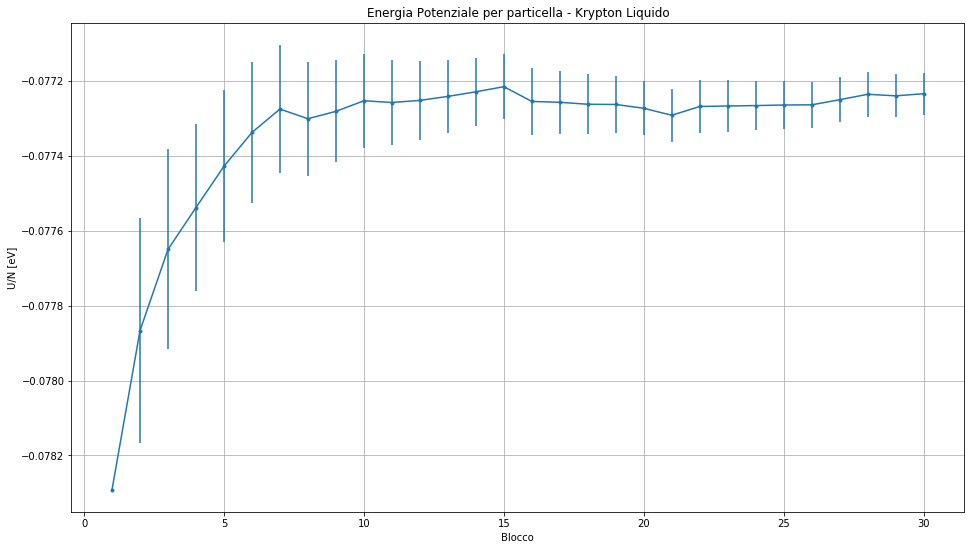

In [26]:
#Argon
k=np.loadtxt("Esercizio07.4/MC/Liquido/output.epot.0")
x=k[:,0]
y=k[:,2]*epsilon_arg
err=k[:,3]*epsilon_arg

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia Potenziale per particella - Argon Liquido")
plt.xlabel("Blocco")
plt.ylabel("U/N [eV]")
plt.grid()
plt.show()

#Krypton
x=k[:,0]
y=k[:,2]*epsilon_kry
err=k[:,3]*epsilon_kry

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia Potenziale per particella - Krypton Liquido")
plt.xlabel("Blocco")
plt.ylabel("U/N [eV]")
plt.grid()
plt.show()

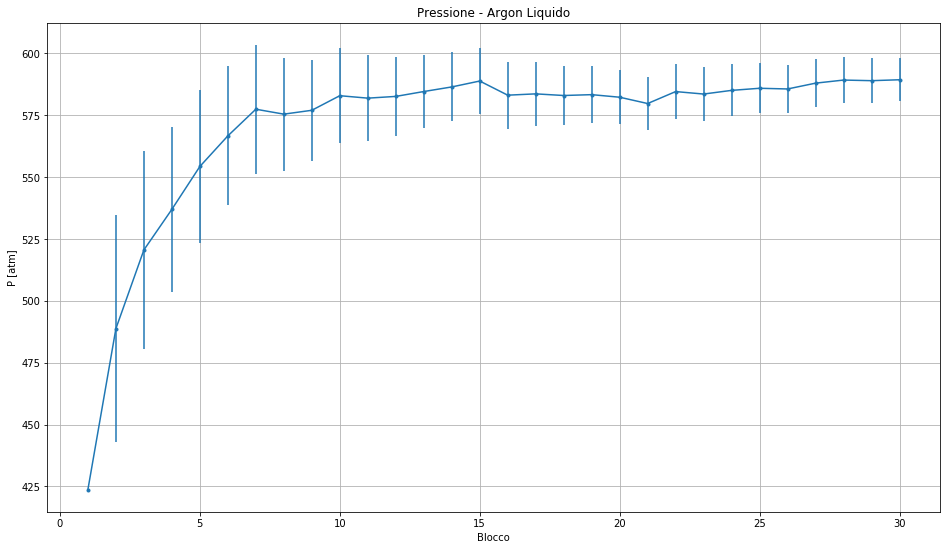

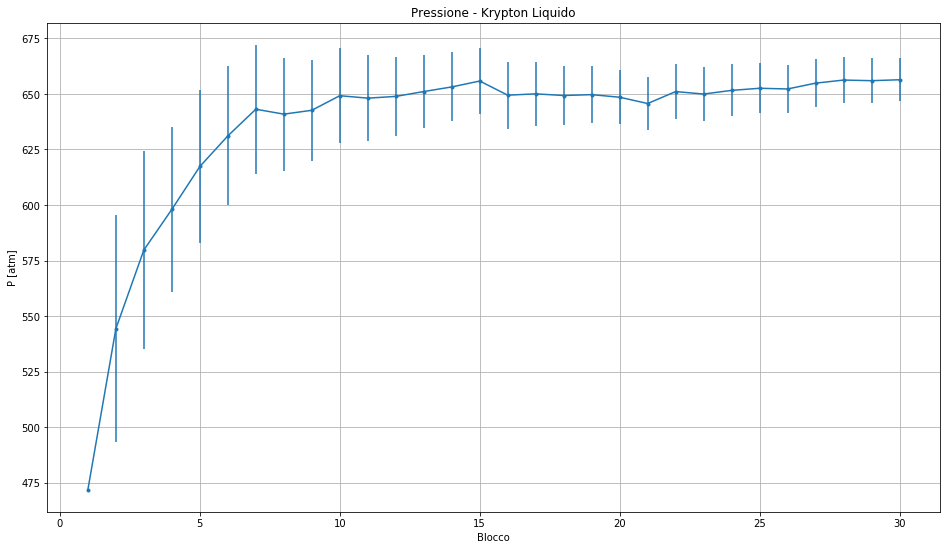

In [27]:
#Argon
k=np.loadtxt("Esercizio07.4/MC/Liquido/output.pres.0")
x=k[:,0]
y=k[:,2]*p_arg
err=k[:,3]*p_arg

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Pressione - Argon Liquido")
plt.xlabel("Blocco")
plt.ylabel("P [atm]")
plt.grid()
plt.show()

#Krypton
x=k[:,0]
y=k[:,2]*p_kry
err=k[:,3]*p_kry

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Pressione - Krypton Liquido")
plt.xlabel("Blocco")
plt.ylabel("P [atm]")
plt.grid()
plt.show()

# Gas

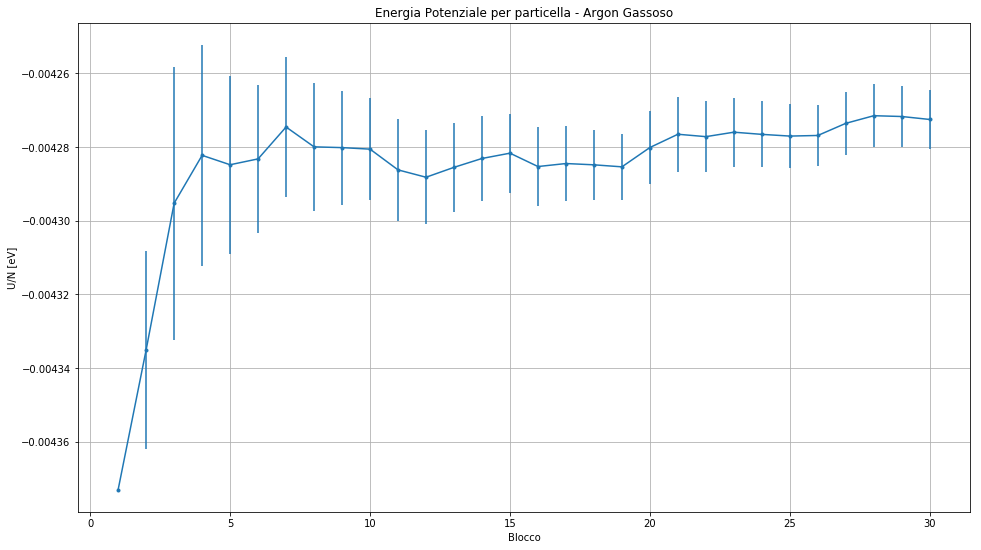

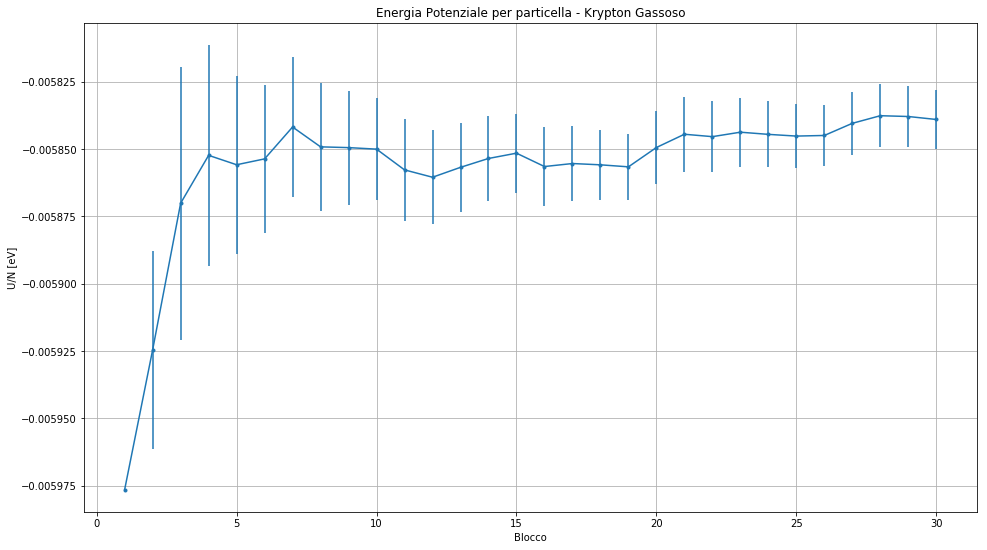

In [28]:
#Argon
k=np.loadtxt("Esercizio07.4/MC/Gas/output.epot.0")
x=k[:,0]
y=k[:,2]*epsilon_arg
err=k[:,3]*epsilon_arg

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia Potenziale per particella - Argon Gassoso")
plt.xlabel("Blocco")
plt.ylabel("U/N [eV]")
plt.grid()
plt.show()

#Krypton
x=k[:,0]
y=k[:,2]*epsilon_kry
err=k[:,3]*epsilon_kry

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia Potenziale per particella - Krypton Gassoso")
plt.xlabel("Blocco")
plt.ylabel("U/N [eV]")
plt.grid()
plt.show()

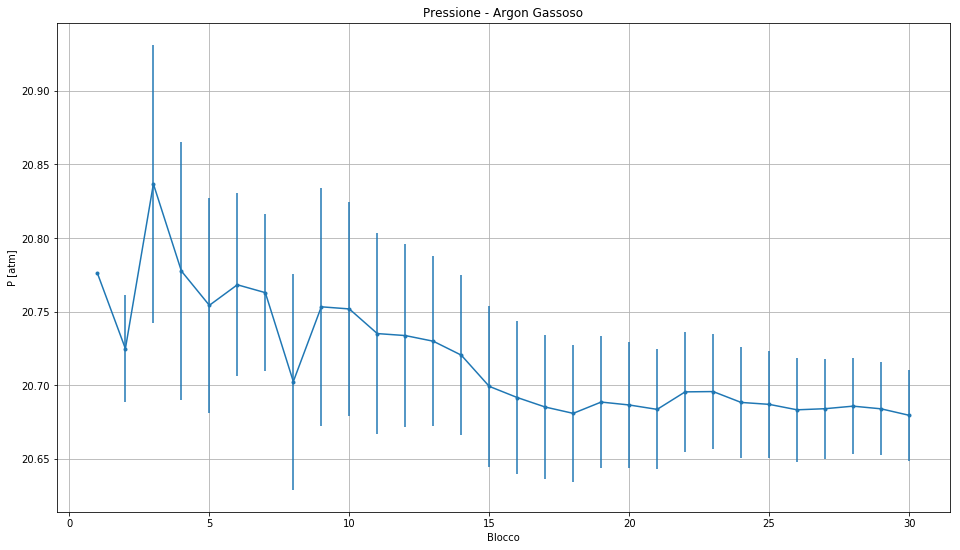

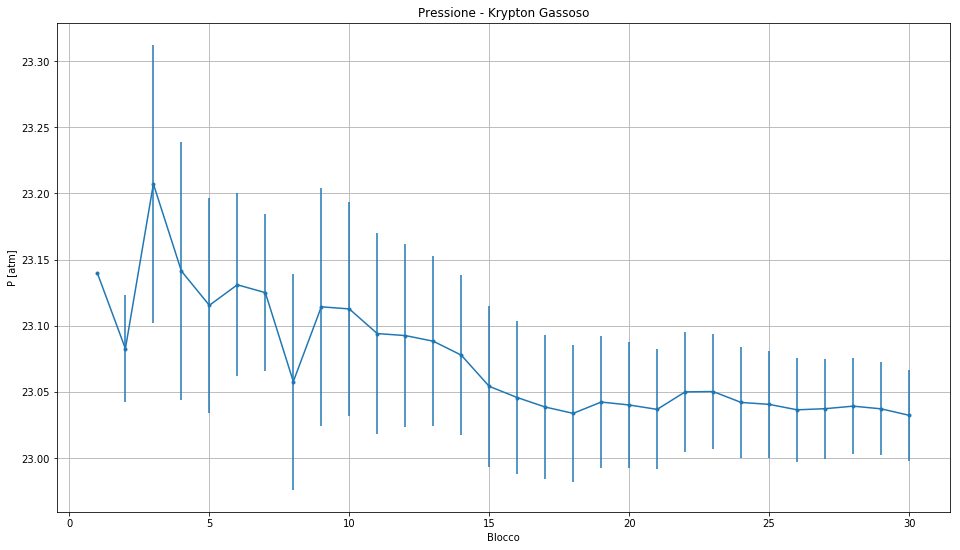

In [29]:
#Argon
k=np.loadtxt("Esercizio07.4/MC/Gas/output.pres.0")
x=k[:,0]
y=k[:,2]*p_arg
err=k[:,3]*p_arg

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Pressione - Argon Gassoso")
plt.xlabel("Blocco")
plt.ylabel("P [atm]")
plt.grid()
plt.show()

#Krypton
x=k[:,0]
y=k[:,2]*p_kry
err=k[:,3]*p_kry

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Pressione - Krypton Gassoso")
plt.xlabel("Blocco")
plt.ylabel("P [atm]")
plt.grid()
plt.show()